# Tensorflow Practice

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [25]:
# check which tensorflow version
print(tf.__version__)

2.6.0


## Generate Data

In [26]:
observations = 1000

# generate xs and zs
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations,1))

# generated algorithm
generated_targets = 2*xs - 3*zs + 5 + noise

# save as numpy file since tensorflow prefers tensors as opposed to other files
np.savez("tf_intro", inputs=generated_inputs, targets=generated_targets)

In [27]:
training_data = np.load('tf_intro.npz')

In [28]:
training_data

## Solving with Tensorflow
**Build Model**

In [29]:
# input size is for each variable, xs and zs
# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1

In [30]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size) # same as outputs = np.dot(inputs,weights) + bias
                            ])

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model.compile(optimizer='sgd', loss='mean_squared_error')


# now fit the model
# epoch = number of iterations
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 51.3911
Epoch 2/100
32/32 - 0s - loss: 4.5386
Epoch 3/100
32/32 - 0s - loss: 1.5276
Epoch 4/100
32/32 - 0s - loss: 0.6562
Epoch 5/100
32/32 - 0s - loss: 0.4202
Epoch 6/100
32/32 - 0s - loss: 0.3630
Epoch 7/100
32/32 - 0s - loss: 0.3509
Epoch 8/100
32/32 - 0s - loss: 0.3364
Epoch 9/100
32/32 - 0s - loss: 0.3380
Epoch 10/100
32/32 - 0s - loss: 0.3406
Epoch 11/100
32/32 - 0s - loss: 0.3408
Epoch 12/100
32/32 - 0s - loss: 0.3350
Epoch 13/100
32/32 - 0s - loss: 0.3385
Epoch 14/100
32/32 - 0s - loss: 0.3396
Epoch 15/100
32/32 - 0s - loss: 0.3373
Epoch 16/100
32/32 - 0s - loss: 0.3355
Epoch 17/100
32/32 - 0s - loss: 0.3384
Epoch 18/100
32/32 - 0s - loss: 0.3342
Epoch 19/100
32/32 - 0s - loss: 0.3395
Epoch 20/100
32/32 - 0s - loss: 0.3451
Epoch 21/100
32/32 - 0s - loss: 0.3328
Epoch 22/100
32/32 - 0s - loss: 0.3323
Epoch 23/100
32/32 - 0s - loss: 0.3364
Epoch 24/100
32/32 - 0s - loss: 0.3331
Epoch 25/100
32/32 - 0s - loss: 0.3318
Epoch 26/100
32/32 - 0s - loss: 0

## Extracts Weights and Bias

In [31]:
# print out weights and bias
model.layers[0].get_weights()

[array([[ 2.0323675],
        [-3.0137763]], dtype=float32), array([5.024024], dtype=float32)]

In [32]:
weights = model.layers[0].get_weights()[0]

weights

array([[ 2.0323675],
       [-3.0137763]], dtype=float32)

In [33]:
bias = model.layers[0].get_weights()[1]

bias

array([5.024024], dtype=float32)

## Extract the Outputs (Make Predictions)

In [36]:
# output values compared to target to evaluate loss function
# model's predictions
model.predict_on_batch(training_data['inputs']).round()

array([[ 23.],
       [  9.],
       [ 53.],
       [-26.],
       [ 31.],
       [-36.],
       [ -7.],
       [ 26.],
       [ -4.],
       [  5.],
       [-22.],
       [-12.],
       [-26.],
       [-24.],
       [  1.],
       [ 10.],
       [ 47.],
       [ 40.],
       [-30.],
       [ 23.],
       [-14.],
       [  1.],
       [ 46.],
       [-30.],
       [-27.],
       [ 24.],
       [-13.],
       [ 20.],
       [ -7.],
       [ 37.],
       [ 13.],
       [  0.],
       [ 11.],
       [  6.],
       [-27.],
       [ -9.],
       [ -3.],
       [ 26.],
       [-14.],
       [ -7.],
       [ 35.],
       [ -6.],
       [  1.],
       [-28.],
       [  2.],
       [-34.],
       [ 36.],
       [ 11.],
       [-38.],
       [ 30.],
       [ 32.],
       [ 14.],
       [ 23.],
       [  4.],
       [ 32.],
       [ -9.],
       [ 30.],
       [-19.],
       [-31.],
       [-19.],
       [-13.],
       [ 29.],
       [-10.],
       [ 43.],
       [ 29.],
       [  8.],
       [ 1

In [12]:
# compare manually
training_data['targets'].round()

array([[-28.],
       [-31.],
       [-33.],
       [ -1.],
       [ 18.],
       [-11.],
       [ 47.],
       [ 10.],
       [-39.],
       [ 25.],
       [ -2.],
       [ 19.],
       [ 22.],
       [  9.],
       [ 34.],
       [ -3.],
       [ -7.],
       [ 37.],
       [-26.],
       [-28.],
       [ 15.],
       [-14.],
       [ 27.],
       [ 21.],
       [ 13.],
       [-17.],
       [-32.],
       [ 34.],
       [ -1.],
       [-29.],
       [  6.],
       [ 13.],
       [  4.],
       [ 20.],
       [ 14.],
       [ 16.],
       [ -7.],
       [-14.],
       [-16.],
       [ 30.],
       [-15.],
       [  1.],
       [ 15.],
       [  9.],
       [ 16.],
       [ -3.],
       [-12.],
       [ 19.],
       [ 24.],
       [ 10.],
       [ -5.],
       [ -6.],
       [-10.],
       [ -7.],
       [  8.],
       [ 10.],
       [-19.],
       [ 20.],
       [-15.],
       [  3.],
       [ 29.],
       [ -7.],
       [ 31.],
       [ -8.],
       [ 45.],
       [ 16.],
       [-2

## Plotting the Data

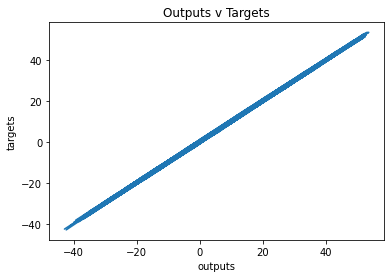

In [37]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.title('Outputs v Targets')
plt.show()

## Tuning Hyperparameters

In [39]:
# input size is for each variable, xs and zs

# how many fields I'll use for my model
input_size = 2

# the prediction
output_size = 1

# make our model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size, # same as outputs = np.dot(inputs,weights) + bias
                                                   kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                   bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                   ), 
                            ])

# try out a custom optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# add optimizer, sgd for stochastic gradient descent
# add L2 norm loss, aka least sum of squared errors
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')


# now fit the model
# epoch = number of iterations
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 24.6300
Epoch 2/100
32/32 - 0s - loss: 1.3157
Epoch 3/100
32/32 - 0s - loss: 0.4290
Epoch 4/100
32/32 - 0s - loss: 0.3626
Epoch 5/100
32/32 - 0s - loss: 0.3705
Epoch 6/100
32/32 - 0s - loss: 0.3734
Epoch 7/100
32/32 - 0s - loss: 0.3604
Epoch 8/100
32/32 - 0s - loss: 0.3665
Epoch 9/100
32/32 - 0s - loss: 0.3930
Epoch 10/100
32/32 - 0s - loss: 0.3657
Epoch 11/100
32/32 - 0s - loss: 0.3525
Epoch 12/100
32/32 - 0s - loss: 0.3605
Epoch 13/100
32/32 - 0s - loss: 0.3712
Epoch 14/100
32/32 - 0s - loss: 0.3695
Epoch 15/100
32/32 - 0s - loss: 0.3975
Epoch 16/100
32/32 - 0s - loss: 0.3699
Epoch 17/100
32/32 - 0s - loss: 0.4059
Epoch 18/100
32/32 - 0s - loss: 0.3613
Epoch 19/100
32/32 - 0s - loss: 0.4003
Epoch 20/100
32/32 - 0s - loss: 0.4089
Epoch 21/100
32/32 - 0s - loss: 0.3938
Epoch 22/100
32/32 - 0s - loss: 0.3768
Epoch 23/100
32/32 - 0s - loss: 0.3738
Epoch 24/100
32/32 - 0s - loss: 0.3510
Epoch 25/100
32/32 - 0s - loss: 0.3530
Epoch 26/100
32/32 - 0s - loss: 0

In [40]:
weights = model.layers[0].get_weights()[0]

bias = model.layers[0].get_weights()[1]

print('Weights are:\n', weights)
print('Bias is:\n', bias)

Weights are:
 [[ 1.9943117]
 [-3.0378253]]
Bias is:
 [5.0332875]


In [41]:
# create a dataframe for targets v predicted
model_data = pd.DataFrame(model.predict_on_batch(training_data['inputs']).round(), columns=['predicted'])

In [42]:
model_data.head()

,predicted
0,23.0
1,9.0
2,53.0
3,-26.0
4,31.0


In [43]:
model_data['actual'] = pd.DataFrame(training_data['targets'].round())

In [44]:
model_data.head()

,predicted,actual
0,23.0,23.0
1,9.0,8.0
2,53.0,53.0
3,-26.0,-27.0
4,31.0,30.0


In [45]:
model_data.shape

(1000, 2)

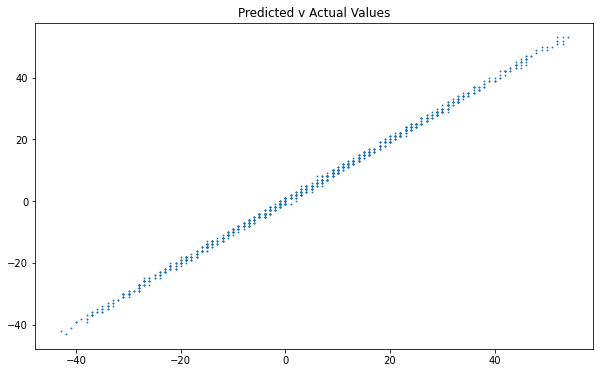

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(x='predicted', y='actual', data=model_data, s=.7)
# plt.xlabel('predicted')
# plt.ylabel('actual')
plt.title('Predicted v Actual Values')
plt.show()

<Figure size 720x576 with 0 Axes>

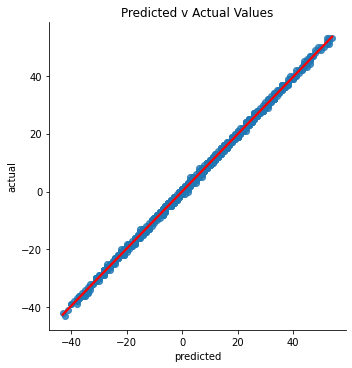

In [62]:
plt.figure(figsize=(10,8))
sns.lmplot(x='predicted', y='actual', data=model_data, line_kws={'color': 'red'})
# plt.xlabel('predicted')
# plt.ylabel('actual')
plt.title('Predicted v Actual Values')
plt.show();